#### __This notebook is used to check for abnormalities during special events which could cause irrgegularities in the data.__
For example new years, eastern and covid isolation. 

_Common sources of PM10 particles include:_  
 dust from unsealed roads  
 smoke from fires  
 sea salt   
 car and truck exhausts  
 industry  

#### _To-Do:_  
- [ x ] Combine December and January of following years to gauge the spike of pm10 on new years  
- [ ] Look at March of a specific year outside of covid years  
- [ ] Get averages of each year and compare to average of covid years -- move this task to the seaborn notebook

#### _Supporting Sources_
https://www.hamburg.de/contentblob/18482644/f08783286efb17f169a36876e2a62eb9/data/pdf-osterfeuerbericht-2024.pdf  

#### _ANMERKUNGEN_
- im März Datenset ist die datetime Spalte vom Typ Objekt und nicht vom Typ datetime -> typecasting
- Umgang mit Sommer- & Winterzeit, ahhh -> Einheitliche Zeitzone UTC? Löschen von überschüssiger Stunde und Auffüllen fehlender Stunde mit Durchschnittswert
- Ostersonntag - broken sensor??
- Umgang fehlender Messwerte: bei 1ner Stunde Mittelwert h(n-1) & h(n+1) -> Abgesprochen und zugestimmt

#### _IMPORTS_

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json

# OSTERN

### KARFREITAG, SAMSTAG & SONNTAG

In [10]:
file_path_march = os.path.join("..", "mc124_data","mc124_data_2024_03.json") # join because different os use either \ or / as file path seperators
df = pd.read_json(file_path_march)
df_pm10_march = df[(df['core'] == 'pm10')]
df_pm10_march.head(2)

,datetime,station,core,component,period,value
0,2024-03-31T23:00:00+02:00,mc124,pm10,pm10_1h,1h,74.0
5,2024-03-31T22:00:00+02:00,mc124,pm10,pm10_1h,1h,75.0


In [11]:
#df_pm10_march.describe()
df_pm10_march.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 3710
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   743 non-null    object 
 1   station    743 non-null    object 
 2   core       743 non-null    object 
 3   component  743 non-null    object 
 4   period     743 non-null    object 
 5   value      743 non-null    float64
dtypes: float64(1), object(5)
memory usage: 40.6+ KB


In [12]:
# turn datetime object into datetime
df_pm10_march['datetime'] = pd.to_datetime(df_pm10_march['datetime'], utc=True)
#df_pm10_march['datetime'].dt.tz_convert('UTC')  #quick fix but also didn't work the way it was supposed to
#df_pm10_march.describe()
df_pm10_march.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 3710
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   datetime   743 non-null    datetime64[ns, UTC]
 1   station    743 non-null    object             
 2   core       743 non-null    object             
 3   component  743 non-null    object             
 4   period     743 non-null    object             
 5   value      743 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 40.6+ KB


C:\Users\a_n_n\AppData\Local\Temp\ipykernel_8900\3454533119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10_march['datetime'] = pd.to_datetime(df_pm10_march['datetime'], utc=True)


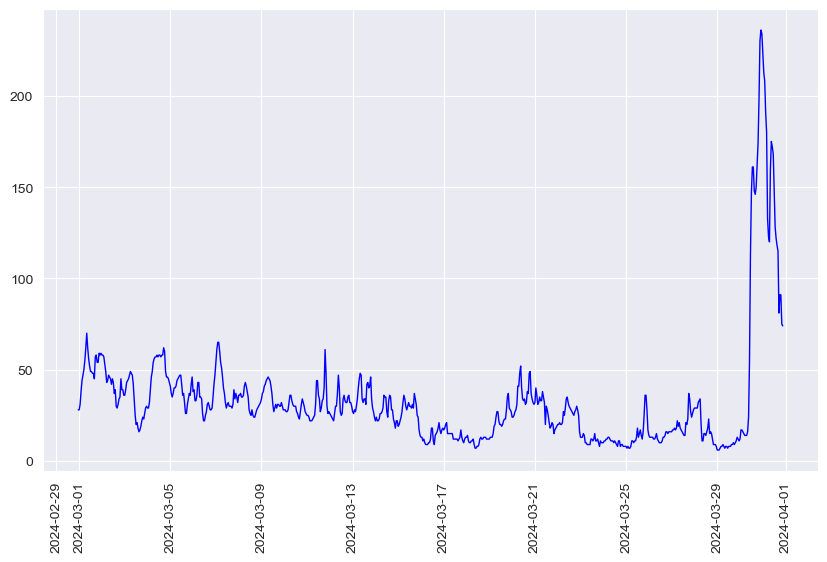

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df_pm10_march['datetime'], df_pm10_march['value'], color="blue", linewidth=1)
plt.xticks(rotation=90)
plt.show()

### Karfreitag bis Ostersonntag

<function matplotlib.pyplot.show(close=None, block=None)>

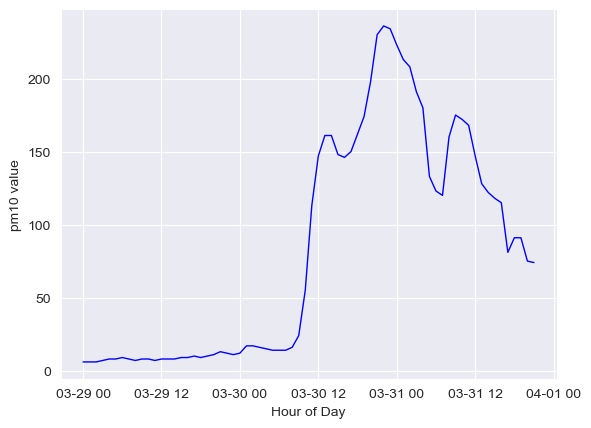

In [14]:
# Multiple days
#targeting specific days which show abnormal numbers:
start_date = '2024-03-29'
end_date = '2024-03-31'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_end_march = df_pm10_march[(df_pm10_march['datetime'].dt.date  >= start_date.date()) &
                           (df_pm10_march['datetime'].dt.date <= end_date.date())]

plt.plot(df_filtered_end_march['datetime'], df_filtered_end_march['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
#plt.title(f'Plot of Value on {target_day}')
#plt.xticks(df_filtered_days['hour'])
plt.show

### Ostersamstag & Ostersonntag

<function matplotlib.pyplot.show(close=None, block=None)>

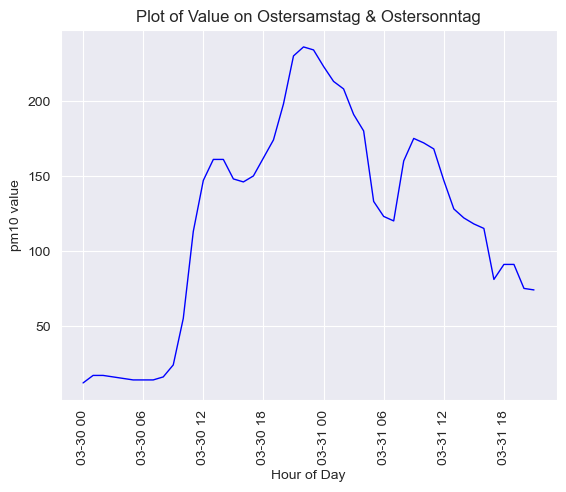

In [15]:
# Multiple days
#targeting specific days which show abnormal numbers:
start_date = '2024-03-30'
end_date = '2024-03-31'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_end_march = df_pm10_march[(df_pm10_march['datetime'].dt.date >= start_date.date()) & 
                           (df_pm10_march['datetime'].dt.date <= end_date.date())]

plt.plot(df_filtered_end_march['datetime'], df_filtered_end_march['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
plt.title(f'Plot of Value on Ostersamstag & Ostersonntag')
#plt.xticks(df_filtered_days['hour'])
plt.xticks(rotation=90)
plt.show

### Ostersamstag

C:\Users\a_n_n\AppData\Local\Temp\ipykernel_8900\3260148640.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_03_30["hour"] = df_2024_03_30["datetime"].map(cutDatetimeToHour)


<function matplotlib.pyplot.show(close=None, block=None)>

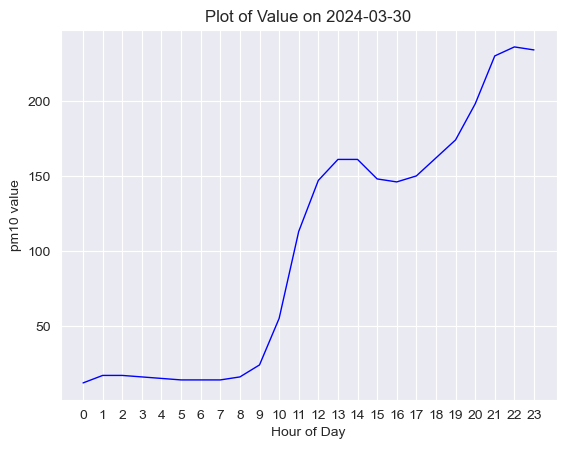

In [16]:
target_day = '2024-03-30'
df_2024_03_30 = df_pm10_march[df_pm10_march['datetime'].dt.date == pd.to_datetime(target_day).date()]
def cutDatetimeToHour(datetime):
    return datetime.hour

df_2024_03_30["hour"] = df_2024_03_30["datetime"].map(cutDatetimeToHour)
#df_2024_03_30.sample()

plt.plot(df_2024_03_30['hour'], df_2024_03_30['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
plt.title(f'Plot of Value on {target_day}')
plt.xticks(df_2024_03_30['hour'])
plt.show

In [17]:
df_2024_03_30.describe()

,value,hour
count,24.000000,24.000000
mean,103.083333,11.500000
std,83.831050,7.071068
min,12.000000,0.000000
25%,16.000000,5.750000
50%,129.500000,11.500000
75%,161.250000,17.250000
max,236.000000,23.000000


### Ostersonntag

C:\Users\a_n_n\AppData\Local\Temp\ipykernel_8900\3568112885.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_03_31["hour"] = df_2024_03_31["datetime"].map(cutDatetimeToHour)


<function matplotlib.pyplot.show(close=None, block=None)>

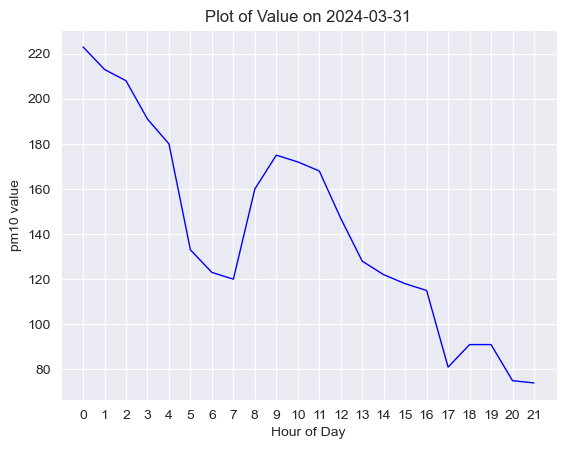

In [18]:
# Single day
target_day = '2024-03-31'
df_2024_03_31 = df_pm10_march[df_pm10_march['datetime'].dt.date == pd.to_datetime(target_day).date()]
def cutDatetimeToHour(datetime):
    return datetime.hour

df_2024_03_31["hour"] = df_2024_03_31["datetime"].map(cutDatetimeToHour)
#df_2024_03_31.sample()

plt.plot(df_2024_03_31['hour'], df_2024_03_31['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
plt.title(f'Plot of Value on {target_day}')
plt.xticks(df_2024_03_31['hour'])
plt.show

In [19]:
df_2024_03_31.head()
df_2024_03_31.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 105
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   datetime   22 non-null     datetime64[ns, UTC]
 1   station    22 non-null     object             
 2   core       22 non-null     object             
 3   component  22 non-null     object             
 4   period     22 non-null     object             
 5   value      22 non-null     float64            
 6   hour       22 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(4)
memory usage: 1.4+ KB


### Ostermontag

In [20]:
file_path_april = os.path.join("..", "mc124_data","mc124_data_2024_04.json") # join because different os use either \ or / as file path seperators
df = pd.read_json(file_path_april)
df_pm10_april = df[(df['core'] == 'pm10')]
df_pm10_april.tail(2)

,datetime,station,core,component,period,value
3590,2024-04-01 01:00:00+02:00,mc124,pm10,pm10_1h,1h,64.0
3595,2024-04-01 00:00:00+02:00,mc124,pm10,pm10_1h,1h,74.0


In [21]:
#df_pm10_april.describe()
df_pm10_april.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 3595
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype                    
---  ------     --------------  -----                    
 0   datetime   720 non-null    datetime64[ns, UTC+02:00]
 1   station    720 non-null    object                   
 2   core       720 non-null    object                   
 3   component  720 non-null    object                   
 4   period     720 non-null    object                   
 5   value      718 non-null    float64                  
dtypes: datetime64[ns, UTC+02:00](1), float64(1), object(4)
memory usage: 39.4+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

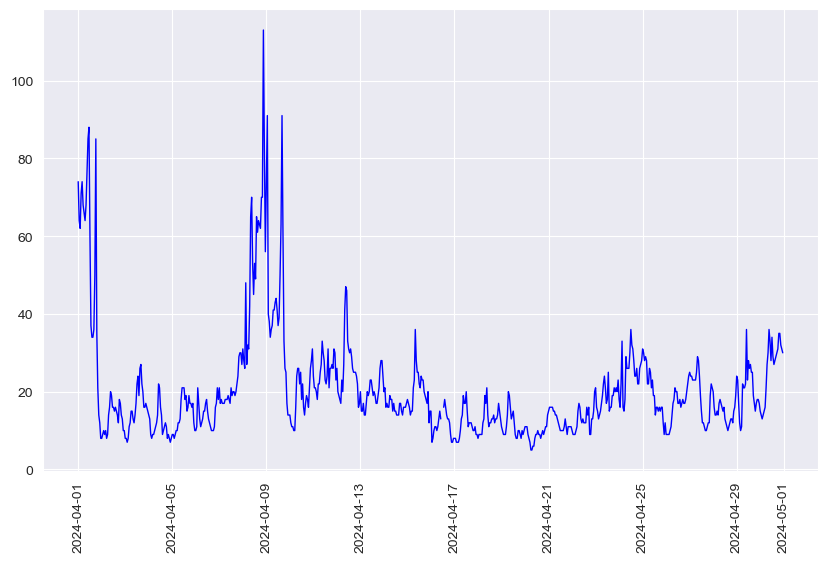

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df_pm10_april['datetime'], df_pm10_april['value'], color="blue", linewidth=1)
#plt.xticks(df_pm10['datetime'])
plt.xticks(rotation=90)
plt.show

In [23]:
#targeting specific days which show abnormal numbers:
start_date = '2024-04-01'
end_date = '2024-04-03'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_days = df_pm10_april[(df_pm10_april['datetime'].dt.date >= start_date.date()) & 
                           (df_pm10_april['datetime'].dt.date <= end_date.date())]

<function matplotlib.pyplot.show(close=None, block=None)>

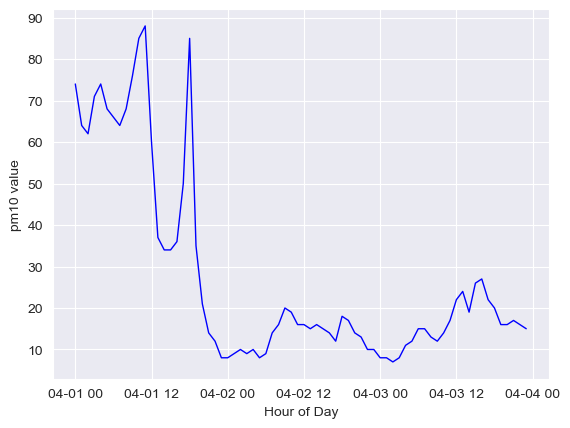

In [24]:
plt.plot(df_filtered_days['datetime'], df_filtered_days['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
#plt.title(f'Plot of Value on {target_day}')
#plt.xticks(df_filtered_days['hour'])
plt.show

In [25]:
target_day = '2024-04-01'
df_2024_04_01 = df_pm10_april[df_pm10_april['datetime'].dt.date == pd.to_datetime(target_day).date()]
def cutDatetimeToHour(datetime):
    return datetime.hour

df_2024_04_01["hour"] = df_2024_04_01["datetime"].map(cutDatetimeToHour)
df_2024_04_01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 3480 to 3595
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype                    
---  ------     --------------  -----                    
 0   datetime   24 non-null     datetime64[ns, UTC+02:00]
 1   station    24 non-null     object                   
 2   core       24 non-null     object                   
 3   component  24 non-null     object                   
 4   period     24 non-null     object                   
 5   value      24 non-null     float64                  
 6   hour       24 non-null     int64                    
dtypes: datetime64[ns, UTC+02:00](1), float64(1), int64(1), object(4)
memory usage: 1.5+ KB


C:\Users\a_n_n\AppData\Local\Temp\ipykernel_8900\846949670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_04_01["hour"] = df_2024_04_01["datetime"].map(cutDatetimeToHour)


<function matplotlib.pyplot.show(close=None, block=None)>

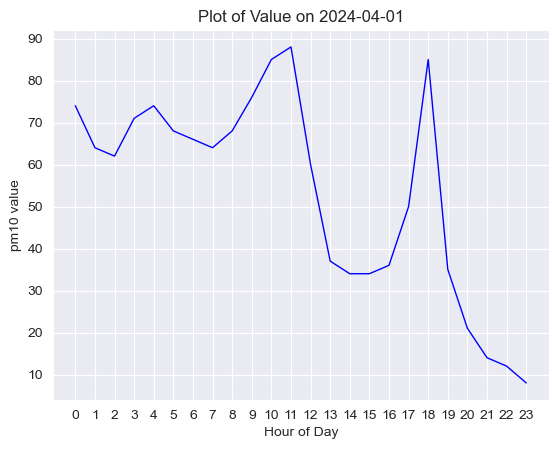

In [26]:
plt.plot(df_2024_04_01['hour'], df_2024_04_01['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
plt.title(f'Plot of Value on {target_day}')
plt.xticks(df_2024_04_01['hour'])
plt.show

### Analyse unerwarteter Auffälligkeit Mitte April

In [27]:
#targeting specific days which show abnormal numbers:
start_date = '2024-04-07'
end_date = '2024-04-12'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_mid_april = df_pm10_april[(df_pm10_april['datetime'].dt.date >= start_date.date()) & 
                           (df_pm10_april['datetime'].dt.date <= end_date.date())]

<function matplotlib.pyplot.show(close=None, block=None)>

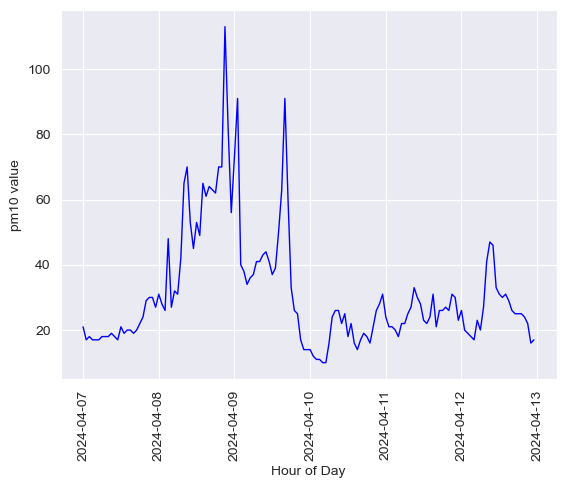

In [28]:
plt.plot(df_filtered_mid_april['datetime'], df_filtered_mid_april['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
#plt.title(f'Plot of Value on {target_day}')
#plt.xticks(df_filtered_days['hour'])
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

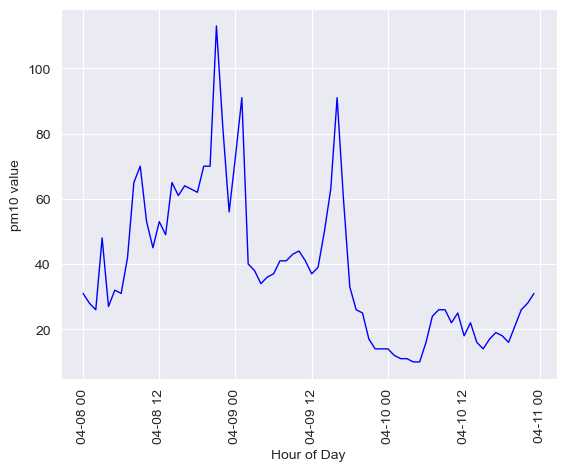

In [29]:
#targeting specific days which show abnormal numbers:
start_date = '2024-04-08'
end_date = '2024-04-10'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_mid_april = df_pm10_april[(df_pm10_april['datetime'].dt.date >= start_date.date()) & 
                           (df_pm10_april['datetime'].dt.date <= end_date.date())]

plt.plot(df_filtered_mid_april['datetime'], df_filtered_mid_april['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
plt.xticks(rotation=90)
#plt.title(f'Plot of Value on {target_day}')
#plt.xticks(df_filtered_days['hour'])
plt.show

08.04. (Di) sowie 09.04. (Mi) auffällig
Anmerkung: besondere Events?

### Karfreitag bis Ostermontag

In [30]:
df_march_april = pd.concat([df_pm10_march, df_pm10_april])
df_march_april.describe()

,value
count,1461.000000
mean,26.731006
std,25.186282
min,5.000000
25%,13.000000
50%,20.000000
75%,31.000000
max,236.000000


In [31]:
df_march_april.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 3595
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   1463 non-null   object 
 1   station    1463 non-null   object 
 2   core       1463 non-null   object 
 3   component  1463 non-null   object 
 4   period     1463 non-null   object 
 5   value      1461 non-null   float64
dtypes: float64(1), object(5)
memory usage: 80.0+ KB


In [32]:
df_march_april['datetime'] = df_march_april['datetime'] = pd.to_datetime(df_march_april['datetime'], utc=True).dt.tz_convert('UTC') 
df_march_april.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 3595
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   datetime   1463 non-null   datetime64[ns, UTC]
 1   station    1463 non-null   object             
 2   core       1463 non-null   object             
 3   component  1463 non-null   object             
 4   period     1463 non-null   object             
 5   value      1461 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 80.0+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

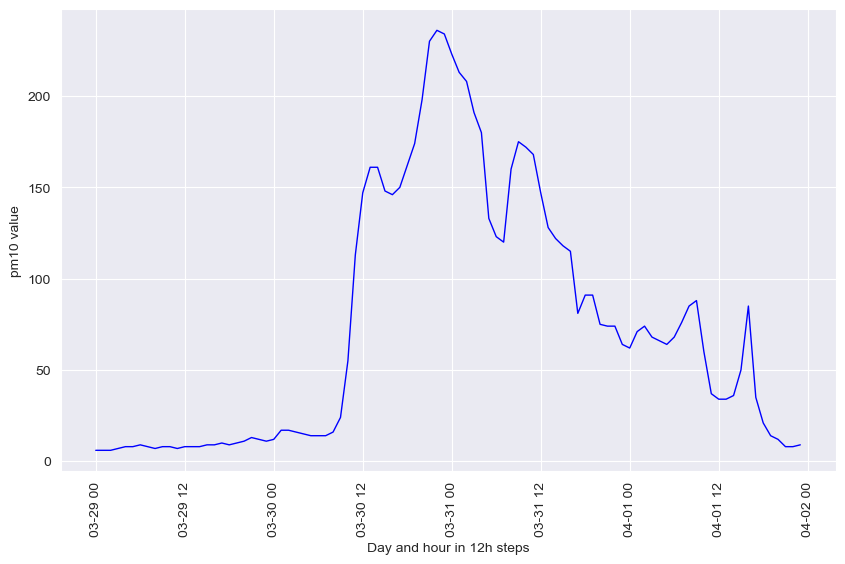

In [33]:
#targeting specific days which show abnormal numbers:
start_date = '2024-03-29'
end_date = '2024-04-1'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_easter = df_march_april[(df_march_april['datetime'].dt.date >= start_date.date()) & 
                           (df_march_april['datetime'].dt.date <= end_date.date())]

plot_df_easter = df_filtered_easter.set_index('datetime').sort_index()
plt.figure(figsize=(10, 6))
plt.plot(plot_df_easter[['value']], color="blue", linewidth=1)
#plt.plot(df_filtered_easter['datetime'], df_filtered_easter['value'], color="blue", linewidth=1)
plt.xlabel('Day and hour in 12h steps')
plt.ylabel('pm10 value')
plt.xticks(rotation=90)
#plt.title(f'Plot of Value on {target_day}')
#plt.xticks(df_filtered_days['hour'])
plt.show

### CRITIQUE: HAD TO CONVERT TO UTC TO LOOK AT SINGLE DAYS